# Projeto - Emissões de gases de efeito estufa no Brasil



* Objetivo do Projeto: Qual atividade econômica brasileira irá afetar mais com o esfeito estufa entre os anos de 2018 e 2030? E qual delas irá minimizar mais esses impactos?

* Descrição do projeto: A partir da análise de dados qualitativos e quantitativos, o projeto objetiva prever qual atividade econômica brasileira irá afetar mais com o esfeito estufa entre os anos de 2018 e 2030. Utilizaremos como forma de mensurar o impacto de cada uma levando em consideração, tanto a quantidade de gás emitido, quanto o tipo e reações dele. Utilizaremos como forma de prever, as tendências de crescimento de cada área, tais como aumento percentual da emissão de um certo gás em uma certa atividade específica ou sua restituição. 

 fonte: https://basedosdados.org

In [3]:

import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
dados =pd.read_csv('dados_basedosdados.csv')

In [5]:
dados.head()

,ano,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,produto,emissao
0,1970,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,230462.17
1,1971,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,226016.30
2,1972,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,220101.20
3,1973,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,214195.56
4,1974,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,186862.84


In [8]:
dados.dtypes

ano                       int64
setor                    object
processo_emissor         object
forma_emissao            object
processo_especifico      object
tipo_atividade           object
atividade_especifica     object
tipo_emissao             object
gas                      object
atividade_economica      object
produto                  object
emissao                 float64
dtype: object

In [6]:
#Renomeando Variáveis
dados = dados.rename(columns={'nivel_1': 'setor'})
dados = dados.rename(columns={'nivel_2': 'processo_emissor'})
dados = dados.rename(columns={'nivel_3': 'forma_emissao'})
dados = dados.rename(columns={'nivel_4': 'processo_especifico'})
dados = dados.rename(columns={'nivel_5': 'tipo_atividade'})
dados = dados.rename(columns={'nivel_6': 'atividade_especifica'})

In [7]:
#Tabela atualizada com novas nomenclaturas
dados.head()

,ano,setor,processo_emissor,forma_emissao,processo_especifico,tipo_atividade,atividade_especifica,tipo_emissao,gas,atividade_economica,produto,emissao
0,1970,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,230462.17
1,1971,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,226016.30
2,1972,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,220101.20
3,1973,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,214195.56
4,1974,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,186862.84


In [32]:
dados.setor.value_counts(normalize=True).to_frame().round(3)*100 

,setor
Energia,59.0
Mudança de Uso da Terra e Floresta,28.4
Agropecuária,7.2
Processos Industriais,4.1
Resíduos,1.3


Text(0.5, 1.0, 'Maior Setor emissor de gases por ano de 1970 até 2018')

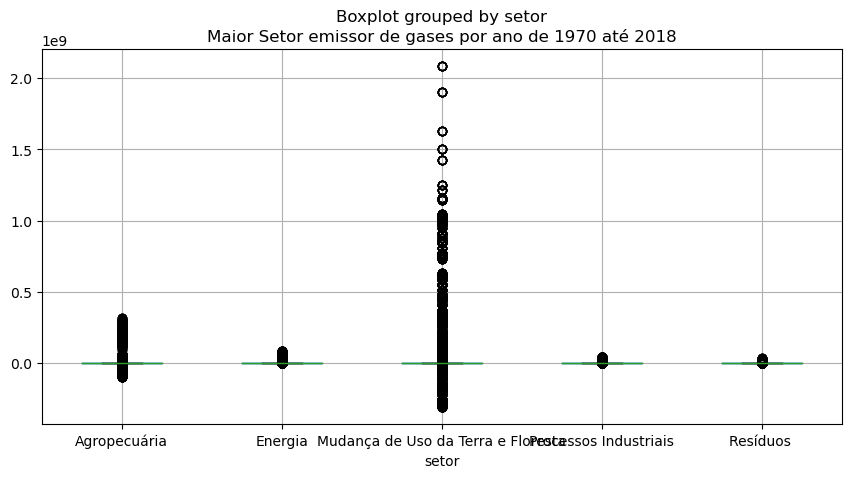

In [33]:
dados.boxplot('emissao',by = 'setor',figsize=(10,5))
plt.title('Maior Setor emissor de gases por ano de 1970 até 2018')

In [34]:
# Não é muito útil devemos usar?

dados.produto.value_counts(normalize=True).to_frame().round(3)*100 

,produto
NÃO SE APLICA,48.1
ENE_ELET,29.3
ACO,8.3
ALIM_BEBIDAS,8.0
ALU,2.9
CAR,2.1
LEI,0.8
CAR/LEI/ALIM_BEBIDAS,0.4


In [35]:
# Rever o boxplot

dados.forma_emissao.value_counts(normalize=True).to_frame().round(3)*100 

,forma_emissao
Industrial,38.6
Produção de Combustíveis,6.3
Mata Atlântica,5.4
Pampa,5.1
Cerrado,5.1
...,...
Produção de Poliestireno,0.0
Produção de Polietileno PEAD,0.0
Produção de Polietileno PEBD,0.0
Produção de Propeno,0.0


Text(0.5, 1.0, 'Maior forma de emissão de gases por ano de 1970 até 2018')

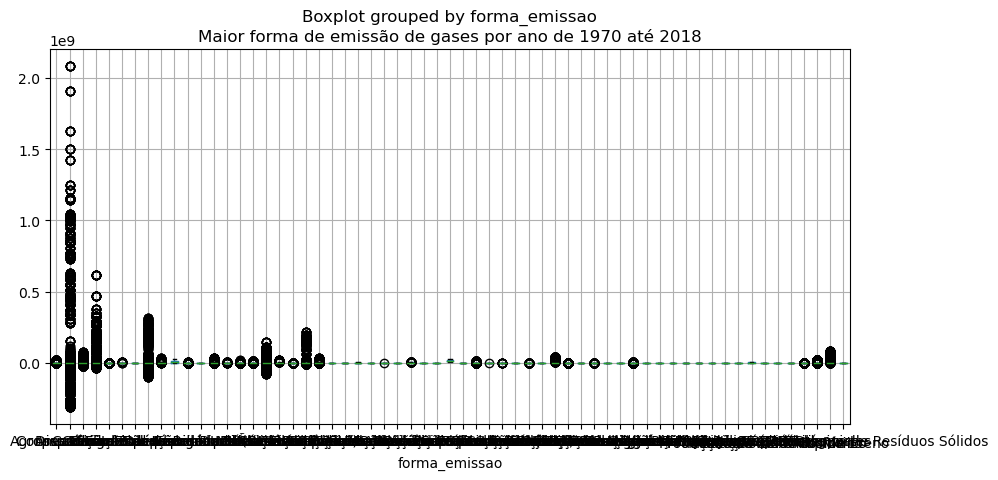

In [36]:
dados.boxplot('emissao',by = 'forma_emissao',figsize=(10,5))
plt.title('Maior forma de emissão de gases por ano de 1970 até 2018')

In [37]:
dados.processo_emissor.value_counts(normalize=True).to_frame()

,processo_emissor
Emissões pela Queima de Combustíveis,0.586457
Alterações de Uso do Solo,0.165439
Solos Manejados,0.053864
Remoção por Mudança de Uso da Terra,0.053864
Remoção por Vegetação Secundária,0.040013
Produção de Metais,0.019567
Remoção em Áreas Protegidas,0.013851
Indústria Química,0.012971
Resíduos Florestais,0.010553
Manejo de Dejetos Animais,0.008135


In [39]:
emissores = dados.loc[(dados.setor == 'Energia') & (dados.emissao) ]
emissores.emissao.sum()

90759814933.68465

In [41]:
emissores = dados.loc[(dados.setor == 'Agropecuária') & (dados.emissao) ]
emissores.emissao.sum()

85495351343.15591

In [42]:
emissores = dados.loc[(dados.setor == 'Mudança de Uso da Terra e Floresta') & (dados.emissao) ]
emissores.emissao.sum()

379303032343.635